# Module 03

## Session 04 Generalization, Underfitting, Overfitting

## Test Machine Learning Model KNN Classifier

In this chapter, we will do:
1. Apply KNN Classifier
    * target: default
    * fetures: employ, debtinc, creddebt, othdebt
2. Using different k (1,3,5,...,100): Apply scaling and validate the model using accuracy in 20% training data
3. Compare accuracies obtained from training and testing data

## Library

In [2]:
# DataFrame
import pandas as pd
import numpy as np

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing and splitting
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# knn
from sklearn.neighbors import KNeighborsClassifier

# performance
from sklearn.metrics import accuracy_score

## Data

In [4]:
bankloan = pd.read_csv('./datasets/bankloan.csv')

In [6]:
X = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = bankloan['default']

## Data Splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2020,
    stratify=y
)

<b>stratify</b>:<br>
if data = 90% of 1 and 10% of 0<br>
stratify makes the train data and test data have the same proportion as the source data<br>
--> train data (80% of data) and test data (20% of data) will have 90% of 1 and 10% of 0<br>

## Data Scaling

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Generalization Performance

In [10]:
k = range(1, 100, 2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    # fitting model
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    # test accuracy
    y_test_pred = knn.predict(X_test_scaled)
    acc_test = accuracy_score(y_test, y_test_pred)
    testing_accuracy.append(acc_test)

    # train accuracy
    y_train_pred = knn.predict(X_train_scaled)
    acc_train = accuracy_score(y_train, y_train_pred)
    training_accuracy.append(acc_train)

    # the best k
    if score < acc_test:
        score = acc_test
        best_k = i

In [11]:
print('Best k: ', best_k)
print('Best Score: ', score)

Best k:  31
Best Score:  0.8285714285714286


Text(0, 0.5, 'Accuracy')

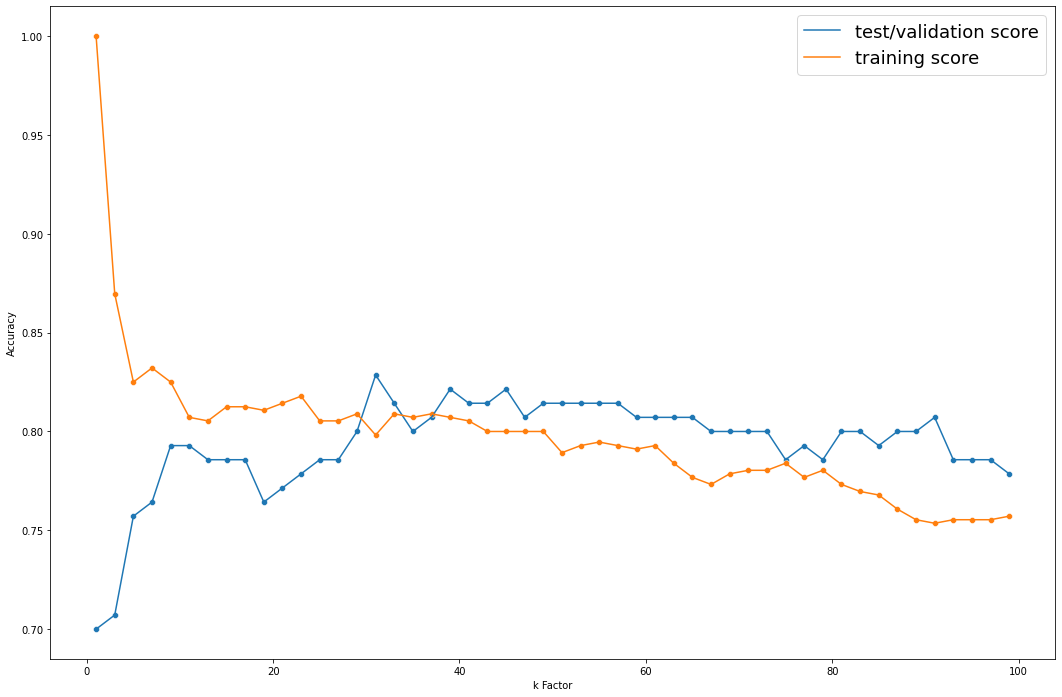

In [17]:
plt.figure(figsize=(18,12))

sns.lineplot(x=k, y=testing_accuracy)
sns.scatterplot(x=k, y=testing_accuracy)

sns.lineplot(x=k, y=training_accuracy)
sns.scatterplot(x=k, y=training_accuracy)

plt.legend(['test/validation score', 'training score'], fontsize=18)

plt.xlabel('k Factor')
plt.ylabel('Accuracy')

<b>Highlight</b>:
1. k = 1 score train 100%, core test 70%, means KNN can predict 70 out of 100
2. As k is getting higher from 1 to 30s, KNN becomes optimum 

## Test Machine Learning Model Decision Tree

In this chapter, we will do:
1. Apply Decision Tree Classifier
    * target: default
    * fetures: employ, debtinc, creddebt, othdebt
2. Using different k (1,3,5,...,100): Apply scaling and validate the model using accuracy in 20% training data
3. Compare accuracies obtained from training and testing data
4. you may try another hyperparameter such as minimum samples split, munimum samples leaf, etc.

## Library

In [22]:
from sklearn.tree import DecisionTreeClassifier

## Generalization Performnace

In [23]:
depth = range(1, 26)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    # fitting model
    tree = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    tree.fit(X_train, y_train)

    # test accuracy
    y_test_pred = tree.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    testing_accuracy.append(acc_test)

    # train accuracy
    y_train_pred = tree.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    training_accuracy.append(acc_train)

    # the best depth
    if score < acc_test:
        score = acc_test
        best_depth = i

In [24]:
print('Best depth: ', best_depth)
print('Best Score: ', score)

Best depth:  8
Best Score:  0.7857142857142857


Text(0, 0.5, 'Accuracy')

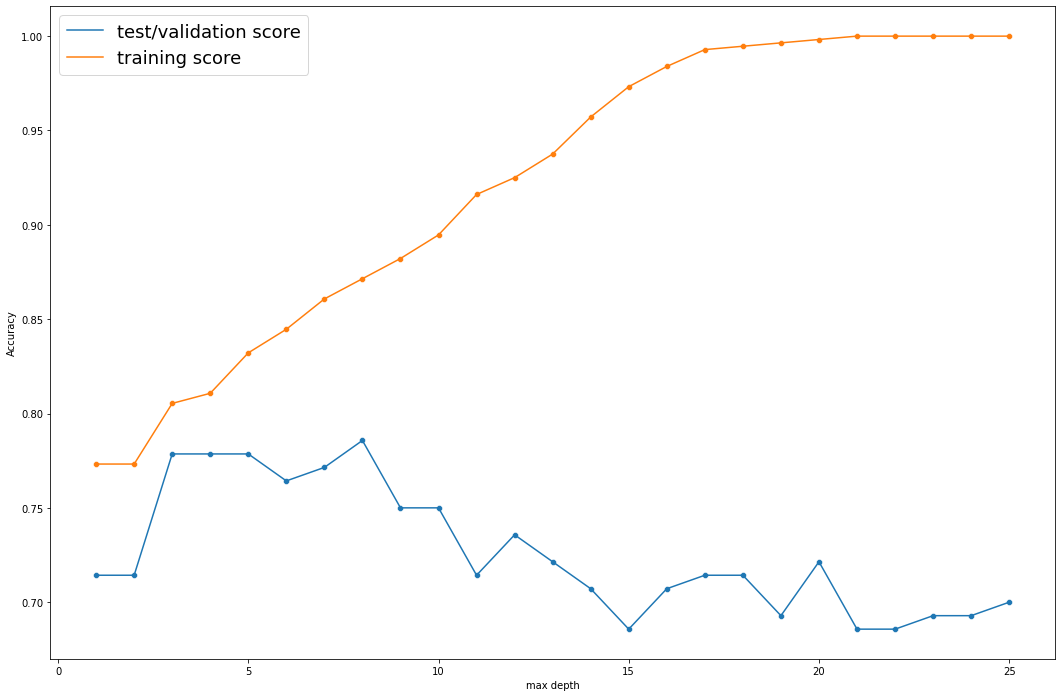

In [25]:
plt.figure(figsize=(18,12))

sns.lineplot(x=depth, y=testing_accuracy)
sns.scatterplot(x=depth, y=testing_accuracy)

sns.lineplot(x=depth, y=training_accuracy)
sns.scatterplot(x=depth, y=training_accuracy)

plt.legend(['test/validation score', 'training score'], fontsize=18)

plt.xlabel('max depth')
plt.ylabel('Accuracy')

<b>Interpretation</b>:
1. depth 1,2,3 are underfitting because test score and training score are low
2. depth 4,5,6,... are overfitting because the training score are much higher than test score
3. optimum depth are 8 which score 0.7857 (training score > test score)
    * meaning decision tree model are overfitting
4. more higher depth, the training score can get to 100% as the test score are much lower and decreasing

<b>Max_depth</b>:
1. Too high max_depth: overfitting
2. Too low max_depth: underfitting